#  COVID vaccination vs. mortality

Source:https://www.kaggle.com/datasets/sinakaraji/covid-vaccination-vs-death

This dataset provides data on covid vaccination and COVID deaths worldwide (198 countries) for the period from 13/12/2020 to 26/12/2021. The data set line shows how many people were vaccinated in a particular country on a given day, how many new deaths were recorded, the population of that country, and the percentage of vaccinated people compared to the population.

The purpose of the analysis is to prepare the data for analysis and analyze it using a linear regression model.

## Understanding and cleaning DATA

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pylab as pl
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import matplotlib as mpl
from scipy import stats
import seaborn as sns

In [7]:
df = pd.read_csv('covid-vaccination-vs-death_ratio.csv')

In [8]:
df.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40295077.0,1.113977
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40295077.0,1.167242
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40295077.0,1.182197
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40295077.0,1.189654
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40295077.0,1.190155


In [9]:
#Column values:
#country- country
#iso_code-country code
#date- Date of data entry
#total_vaccinations- amount (total) doses of COVID vaccine
#people_vaccinated- number of people vaccinated with at least one dose
#people_fully_vaccinated- number of people who are vaccinated in 2 doses
#New_deaths, number of covid deaths on that day
#population- 2021 population of each country
#ratio-percent of vaccinated people (people_vaccinated/population)

In [10]:
#remove an unnecessary column

df.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
len(df) #shows how many rows has df

26623

In [12]:
len(df['country'].unique()) #shows how many countries in this dataset

198

In [13]:
len(df['iso_code'].unique()) #iso_code has the same lengh as country column, so decided to drop it.

198

In [14]:
df.drop('iso_code', axis=1, inplace=True)

In [15]:
df.isnull().sum() #dataset has no null values

country                    0
date                       0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
New_deaths                 0
population                 0
ratio                      0
dtype: int64

In [16]:
df.describe().round(2)

,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
count,2.662300e+04,2.662300e+04,2.662300e+04,26623.00,2.662300e+04,26623.00
mean,2.624900e+07,1.587149e+07,1.015975e+07,104.34,5.068306e+07,36.06
std,9.172916e+07,5.852142e+07,3.409173e+07,343.70,1.585035e+08,27.29
min,1.000000e+00,1.000000e+00,1.000000e+00,-92.00,1.373000e+03,0.00
25%,6.062655e+05,4.006990e+05,1.765970e+05,1.00,3.354825e+06,9.94
50%,3.570392e+06,2.248865e+06,1.169177e+06,10.00,1.034502e+07,32.82
75%,1.560763e+07,8.804162e+06,5.698058e+06,52.00,3.823269e+07,60.42
max,2.422908e+09,1.225000e+09,1.076308e+09,8786.00,1.446645e+09,122.15


In [17]:
#Insights:
#1.During the period from 13.12.2020 to 26.12.2021, 26623000 deaths from COVID worldwide were recorded;
#2. About 36% of the world's population was vaccinated between 13/12/2020 and 26/12/2021.
#3.There is a country that has declared more vaccinated people than their population.
#4.On average, more than 100000 people died from COVID worldwide per day.

In [18]:
df.info() #datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26623 entries, 0 to 26622
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  26623 non-null  object 
 1   date                     26623 non-null  object 
 2   total_vaccinations       26623 non-null  float64
 3   people_vaccinated        26623 non-null  float64
 4   people_fully_vaccinated  26623 non-null  float64
 5   New_deaths               26623 non-null  int64  
 6   population               26623 non-null  float64
 7   ratio                    26623 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB


In [40]:
# Convert date to Datetime type 
df['date'] = pd.to_datetime(df['date'])

# Check result
df['date'].head()

0   2021-05-11
1   2021-05-20
2   2021-05-24
3   2021-05-26
4   2021-05-27
Name: date, dtype: datetime64[ns]

In [19]:
df['country'].value_counts() #shows how ofen countries updated their information

United States of America       376
Israel                         373
Canada                         369
Switzerland                    367
Germany                        364
                              ... 
Tuvalu                           4
Niue                             2
Turkmenistan                     2
Falkland Islands (Malvinas)      2
Tokelau                          1
Name: country, Length: 198, dtype: int64

In [20]:
df['population'].unique().sum() #total population in this dataset

7706449642.0

In [21]:
df.groupby('country') [['New_deaths']].sum().sort_values('New_deaths',ascending=False) 

,New_deaths
country,
United States of America,501036
Brazil,390913
India,309859
Russian Federation,193712
Mexico,121932
...,...
Comoros,0
Solomon Islands,0
Burundi,0


In [22]:
#Since the statistics on new deaths are not linked to the population, 
#I will create a new column so that we can compare:

In [23]:
df['deaths_ratio']=df['New_deaths']/ df['population']

In [24]:
df.groupby('country') [['deaths_ratio']].sum().sort_values('deaths_ratio',ascending=False)[0:20]

,deaths_ratio
country,
Peru,0.002809
Slovakia,0.002338
Latvia,0.002086
Hungary,0.002027
Brazil,0.001821
Lithuania,0.001808
Montenegro,0.001793
Paraguay,0.001757
Argentina,0.001535


In [25]:
#Top 20 countries with the highest covid-related mortality rates

In [26]:
maxrating=df.groupby('country') [['country','ratio']].max().sort_values('ratio',ascending=False)

In [27]:
maxrating

,country,ratio
country,,
Gibraltar,Gibraltar,122.149682
Malta,Malta,99.307358
United Arab Emirates,United Arab Emirates,98.484635
Cuba,Cuba,91.873382
Brunei Darussalam,Brunei Darussalam,91.328883
...,...,...
South Sudan,South Sudan,1.980167
Yemen,Yemen,1.805868
Chad,Chad,1.666099


In [28]:
#The best vaccination rating was achieved by these countries. Gibraltar also vaccinated Spanish citizens, 
#thats why they declared more people vaccinated than their population.

## DATA VISUALISATION

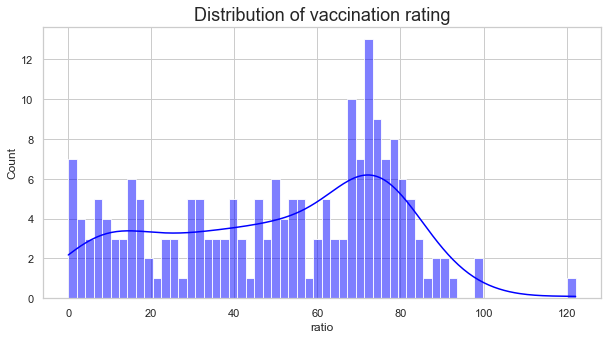

In [35]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.histplot(maxrating['ratio'], bins= 60,kde='True', color="blue")
plt.title("Distribution of vaccination rating", fontsize=18);

Insight: the highest distribution of vaccination rating is between 70-80 %.

C:\Users\ingri\AppData\Local\Temp/ipykernel_48836/235407226.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meanratio = df.groupby('date') ['date','ratio'].mean()


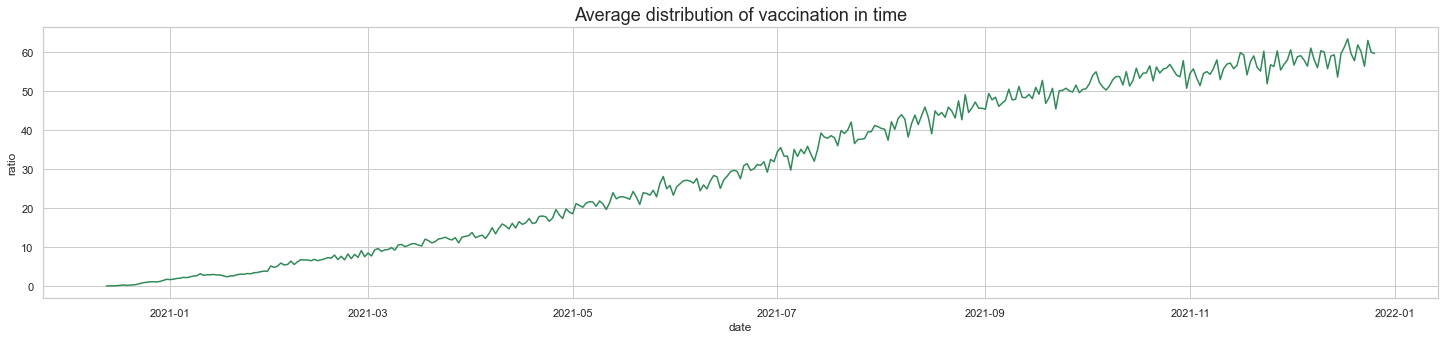

In [41]:
sns.set(rc={'figure.figsize':(25,5)})
sns.set_style('whitegrid')
meanratio = df.groupby('date') ['date','ratio'].mean()
sns.lineplot(data=meanratio, x="date", y="ratio", color="seagreen")
plt.title("Average distribution of vaccination in time", fontsize=18);

Insight: lineplot shows how vaccination increased over the time.

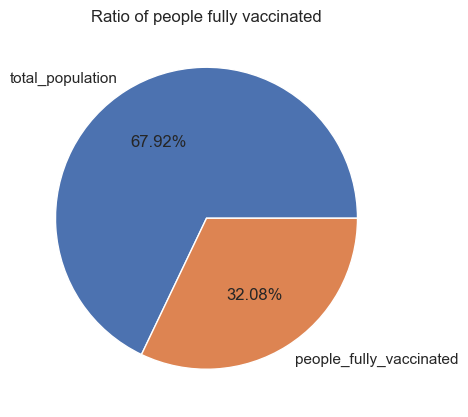

In [42]:
total_population=df['population'].unique().sum() #total population in this dataset
df_country = df.groupby('country').agg({'people_fully_vaccinated':max})
sum_vac_full = df_country['people_fully_vaccinated'].sum()
plt.figure(figsize=(10,5),dpi=100)
plt.pie(
    [total_population,sum_vac_full],
    autopct='%.2F%%',
    labels=['total_population','people_fully_vaccinated'])
plt.title('Ratio of people fully vaccinated')
plt.show()

Text(0.5, 1.0, 'Vaccination rating and new deaths in Lithuania')

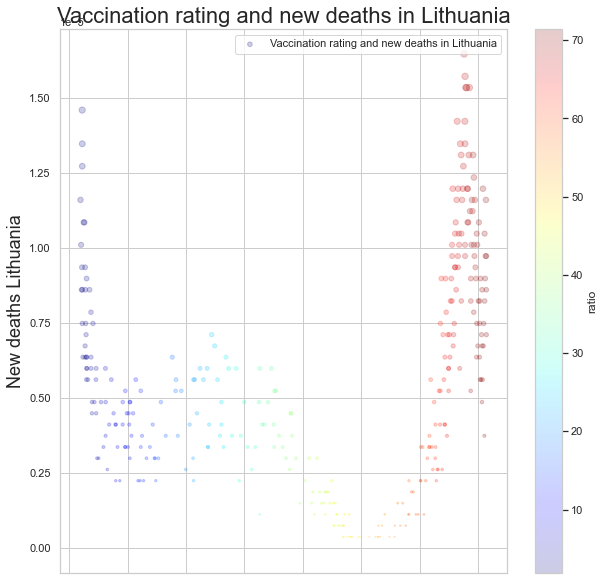

In [44]:
df_Lietuva = df[df['country']=='Lithuania']
df_Lietuva.plot(
    kind='scatter',
    x='ratio',
    y='deaths_ratio',
    label='Vaccination rating and new deaths in Lithuania',
    alpha=0.2,
    figsize=(10,10),
    s=df_Lietuva['New_deaths'],
    c='ratio',
    cmap=plt.get_cmap('jet'),
    colorbar=True)

plt.xlabel('rating(%)',fontsize=15)
plt.ylabel('New deaths Lithuania',fontsize=18)
plt.title('Vaccination rating and new deaths in Lithuania',fontsize=22)

<AxesSubplot:>

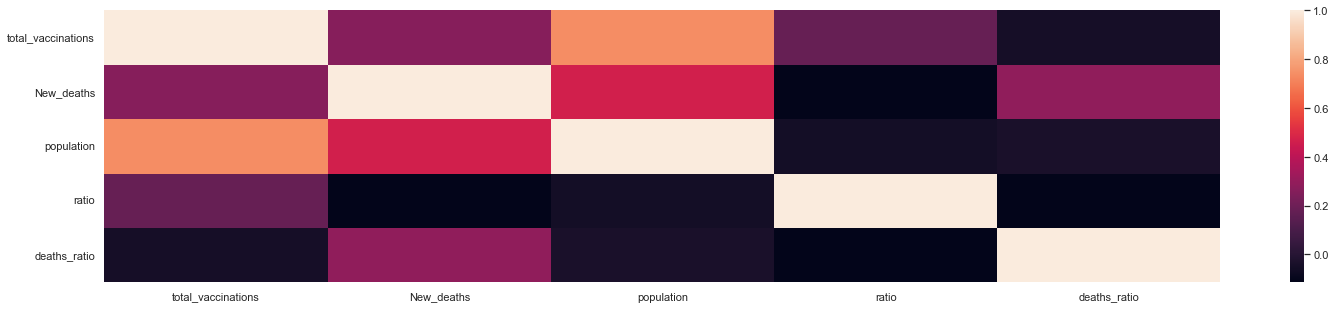

In [59]:
#Correlation between values
df_1 = df[['total_vaccinations','New_deaths','population','ratio','deaths_ratio']]
sns.heatmap(df_1.corr())

Text(0.5, 1.0, 'Statistics on vaccinations and new deaths in Lithuania')

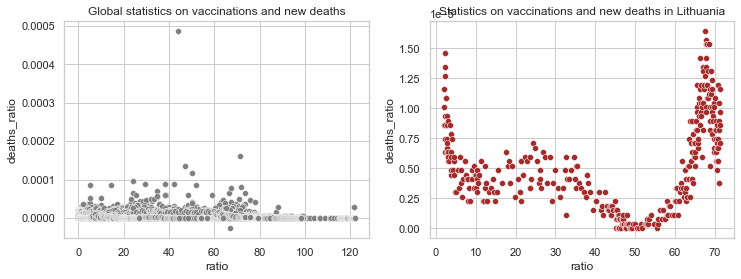

In [61]:
fig, axs = plt.subplots(1,2, figsize=(12,4)) 
sns.scatterplot(x = 'ratio', y =  'deaths_ratio', data=df, ax=axs[0], color='grey')
sns.scatterplot(x = 'ratio', y = 'deaths_ratio', data=df_Lietuva, ax=axs[1], color='brown')

axs[0].set_title("Global statistics on vaccinations and new deaths")
axs[1].set_title("Statistics on vaccinations and new deaths in Lithuania")


## LINEAR REGRESSION

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [63]:
# Define x,y
X = df_Lietuva[['ratio']]
y = df_Lietuva[['deaths_ratio']]

In [64]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [65]:
len(X_train)

274

In [66]:
len(y_train)

274

In [67]:
len(X_test)

69

In [68]:
len(X)

343

In [69]:
lm = LinearRegression()

In [70]:
lm.fit(X_train, y_train)

LinearRegression()

In [71]:
print(lm.intercept_)

[3.80596159e-06]


In [72]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
ratio,3.523269e-08


In [73]:
predictions = lm.predict(X_test)

In [74]:
predictions[0]

array([6.04488183e-06])

In [75]:
X_test

,ratio
14679,63.546676
14558,31.858918
14555,29.954382
14484,6.227539
14568,35.156005
...,...
14615,47.709567
14514,12.714998
14517,14.285928
14458,2.809787


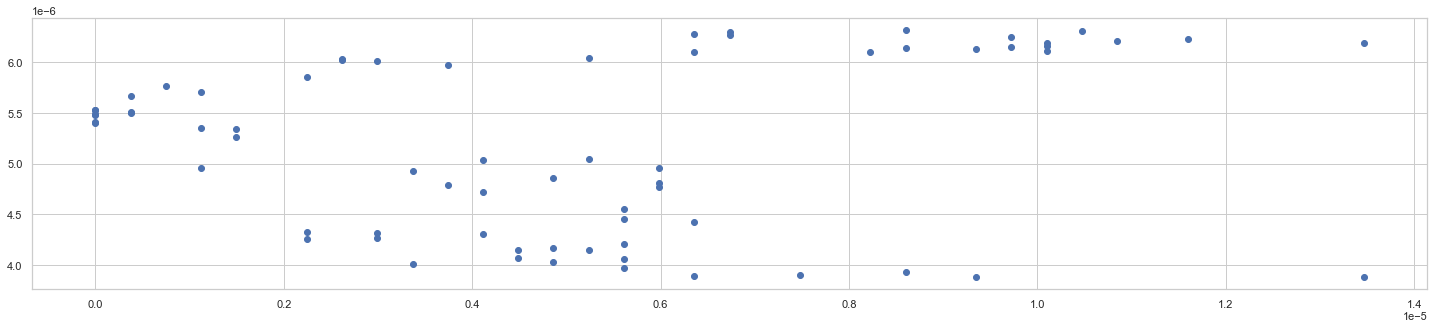

In [76]:
plt.scatter(x=y_test, y=predictions)

In [77]:
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf 

In [78]:
r2_score(y_test, predictions) #The data has little effect on each other.

0.008785517133217069

Text(0.5, 1.0, 'Linear regression')

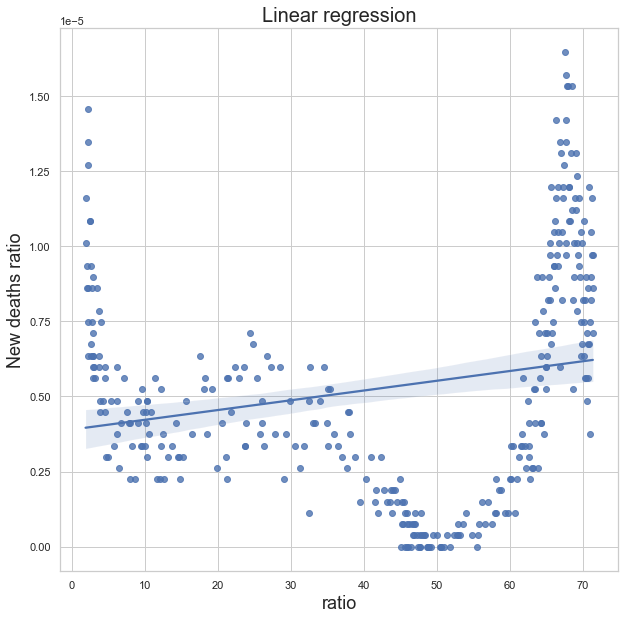

In [80]:
plt.figure(figsize=(10,10))
sns.regplot(x=X, y=y)

plt.xlabel('ratio',fontsize=18)
plt.ylabel('New deaths ratio',fontsize=18)
plt.title('Linear regression',fontsize=20)

The dataset is not sufficient to create a forecast model between the vaccination rating and the mortality rating.